
Parámetros de modelo de ajuste: 

loc = 193.5928, 
scale = 1946.0565


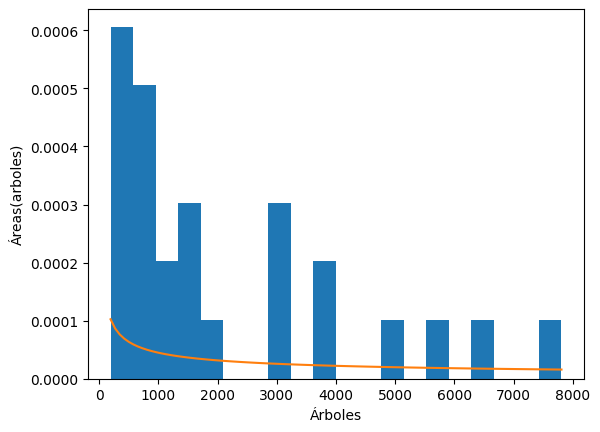

In [105]:
#*****************************************************************#
# Proyecto 2 Modelos Probabilisticos #

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
from funciones import *
from scipy.optimize import curve_fit
import numpy as np
import random
from scipy import stats
from fitter import Fitter
from scipy.stats import expon, skew, kurtosis, exponweib, burr12
import tikzplotlib


#rom scipy import stats
from fitter import Fitter

hacer=True
def figura(hacer, archivo):
    if hacer == 'guardar':
        tikzplotlib.save(archivo)

#PARTE 1

# Importar CSV en un DataFrame
arboles = pd.read_csv('arboles.csv')

#Se guarda en una nueva lista los valores de la columna de nombre de los arboles, ordenada alfabeticamente
lista=arboles['Nombre común'].sort_values()

#Se crea una nueva lista para guardar los valores unicos, es decir, para solo poner una vez los nombres de los arboles qe se repiten
unique_list = []
[unique_list.append(x) for x in lista if x not in unique_list]
unique_list
#Se imprime la lista con los diferenes tipos de arboles ordenados alfabeticamente
#print(unique_list)


#############################################################################################################

#PARTE 2
lista1=arboles[arboles['Nombre común']=="mora"]

#Se guardan todos los diametros de los arboles seleccionados en la lista anterior
diametros=lista1['Diámetro (cm)']

#plt.hist(diametros, color="blue")
#plt.title("Distribucion del diametro de "+str("Mora"))
#tikzplotlib.save('G10.tex')
#plt.show()

#distribucion("jocote")

#distribucion("marañon")

#distribucion("cenízaro")

#distribucion("guayaquil")

#distribucion("melina")

#distribucion("ron ron")

#distribucion("laurel")

#distribucion("mora")

#distribucion("almendro de montaña")

#distribucion("chilamate")





####################################################################################################
def asignaciones(digitos):
    '''Función que asigna un árbol y una
    combinación de dos árboles a cada persona
    con base en los dígitos de su carné.
    '''
    random.seed(digitos)
    lista = arboles['Nombre común'].unique()
    return (random.choice(lista), random.choices(lista, k=2))

digitos = 83362
mis_arboles = asignaciones(digitos)
#print('Mis dos árboles son: {} y {}.'.format(mis_arboles[1][0], mis_arboles[1][1]))
#print('Mi árbol es: {}.'.format(mis_arboles[0]))
#############################################################################################################

#PARTE 3
#Para Almendro de Montaña y Chilamate

#Se guarda en una nueva lista todos los árboles asignados a almendro de montaña
lista1=arboles[arboles['Nombre común']=="almendro de montaña"]

#Se guarda en una nueva lista los diametros de los árboles anteriormente seleccionados
diametros=lista1['Diámetro (cm)']

#Se obtienen los parámetros de mejor ajuste para la anterior lista que contiene los diámetros
#f=Fitter(diametros)
#f.fit()
#f.get_best()
#f.summary()

#Se guarda en una nueva lista todos los árboles asignados a Chilamate
lista2=arboles[arboles['Nombre común']=="chilamate"]

#Se guarda en una nueva lista los diametros de los árboles anteriormente seleccionados
diametros2=lista2['Diámetro (cm)']


# Parámetros de ajuste
#parametros = burr12.fit(diametros2)
#print('\nParámetros de modelo de ajuste: \n')
#print('loc = {:0.4f}, \nscale = {:0.4f}'.format(parametros[0], parametros[1]))

# Datos aleatorios y curva de ajuste
#plt.figure()
#plt.hist(diametros2, 20, density=True, label='Datos aleatorios')
#plt.plot(x, expon.pdf(x, parametros[0], parametros[1]), label='Modelo')
#Seguidamente se procede a hacer lo mismo para el Chlamate

#Se guarda en una nueva lista todos los árboles asignados a Chilamate
#lista2=arboles[arboles['Nombre común']=="chilamate"]

#Se guarda en una nueva lista los diametros de los árboles anteriormente seleccionados
#diametros2=lista2['Diámetro (cm)']

#Se obtienen los parámetros de mejor ajuste para la anterior lista que contiene los diámetros
#f=Fitter(diametros2)
#f.fit()
#f.get_best()
#f.summary()



#############################################################################################################

#Parte 4

#Agrupa los datos por el nombre
grouped = arboles.groupby('Nombre común')

#Obtiene el promedio de los datos agrupados anteriormente
prom = grouped.mean()

#pasa el index del valor maximo de cada columna
arbol_max = prom.idxmax()

#guarda el valor maximo promedio
max_value = prom.max()

#print(arbol_max)
#print("El valor promedio maximo es: ", max_value[4], "y corresponde al: ",arbol_max[4])


#######################################################################################
#Parte 5

#En "pejiballe" se guardan todos los arboles de tipo pejiballe y en la lista diametro se guardan todos sus -
# - respectivos diametros
pejiballe = arboles[arboles['Nombre común']=='pejiballe']
diametro = pejiballe['Diámetro (cm)']

#Se calculan sus radios y sus áreas respectivamente
radios=diametros/2
area=(np.pi)*(radios)*(radios)


#Se imprime el histograma de la distribución de áreas
#plt.hist(area, color="blue")
#plt.title("Distribucion de areas de "+str("pejiballe"))
#plt.show()


# Parámetros de ajuste
#Se obtienen los parámetros de mejor ajuste para sacar el lambda (1/scale)
parametros = expon.fit(area)
print('\nParámetros de modelo de ajuste: \n')
print('loc = {:0.4f}, \nscale = {:0.4f}'.format(parametros[0], parametros[1]))

#Con el scale obtenido
lambd = 1/1946.0565485040306


# Datos aleatorios y curva de ajuste
#Se imprime la distribución de áreas con su respectiva curva de ajuste con la transformación obtenida
plt.figure()
plt.hist(area, 20, density=True, label='Áreas transversales')
x = np.linspace(193.592793295837, 7806.928430005341, 100)
y = lambd*np.exp(-lambd*np.sqrt(x/np.pi))* (1/2*np.pi)*(x/np.pi)**(-0.5) #Función obtenida con la transformación
plt.xlabel('Árboles')
plt.ylabel('Áreas(arboles)')
plt.plot(x, y)
tikzplotlib.save('F.tex') #Se guarda la gráfica
plt.show()

